# Projeto 1: Unsupervised Learning

## Grupo
Nomes: Camila Moraes Brito, Gabriel de Freitas Garcia  
Ra: , 216179

# Divisão do trabalho

Todos os algoritmos, resultados e documentos, incluindo este relatório foram produzidos pelo aluno Gabriel de Freitas Garcia.  
A escolha do dataset adicional foi feita em conjunto pela Dupla.

# Tratamento dos Dados

Foram usados dois datasets em nosso projeto, eles podem ser encontrados em: "../data". O primerio foi um dataset de duas dimensões fornecido pela professora, o segundo foi um dataset sobre ataques cardíacos encontrado em [Dataset ataque cardíaco](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). Em ambos os datasets optou-se por fazer fazer a leitura dos dados e depois seriaizá-los em formato JSON para evitar execuções desnecessárias do algoritmo de recuperação dos dados e por JSON ser mais fácil de recuperar que os formatos fornecidos. O padrão dos objetos JSON será exibido a seguir:  
![teacher data](teacherData.png)
![stroke data](strokeData.png)  
<b>Imagem 1 e 2:</b> Formato dos objetos no JSON serializado

Os notebooks onde este tratamento é feito se encontram em [Teacher Data](../Notebooks/parsingData1_ra216179.ipynb) e [Stroke Data](../Notebooks/parsingData1_ra216179.ipynb). Para o dataset fornecido o tratamento foi apenas verificar se havia dados não numéricos entre os dados corretos, por meio de tratamento de exceção. Para o outro dataset o tratamento será explicado em detalhes mais abaixo. Nesta etapa nenhum dado foi normalizado.

O dataset sobre ataques cardíacos possui 12 features, uma delas, porém, o ID, representa um identificador único de cada indivíduo. Essa feature abrange uma gama muito grande de valores que não possui, provavelmente, nenhum significado e não serve para classificação dos elementos, ou seja, não é relevante para a análise e pode prejudicá-la, portanto optou-se por desprezá-la. As outras features e o tipo de dado que contem são: gênero - classificação (Homem, mulher ou outro), idade - inteiro, hipertensão - booleano, doença cardíaca - booleano, já foi casado - booleano, tipo de trabalho - classificação (Criança, desempregado, autônomo, funcionário privado ou funcionário público), tipo de habitação - classificação (Urbana ou Privada), nível médio de glicose - número contínuo, índice de massa corpórea - número contínuo, status de fumo - classificação (nunca fumou, ex-fumante, fumante ou desconhecido), ataque cardíaco - booleano.

Tendo em vista que os métodos de aprendizado não supervisionado utilizados precisam de números para trabalhar, todos os dados que não fossem numéricos precisaram ser adaptados, utilizando uma codificação desenvolvida por um dos membros da equipe que será explicada abaixo

Gênero:  
Mulher : 1  
Outro : 2  
Homem : 3  

Essa decisão foi tomada com base numa ideia de proximidade, Mulher e homem são diferentes e opostos em termos classificatórios já outro, o desenvolvedor da codificação optou por não entrar em discussões que fogem ao escopo do projeto, porém interpretou que está igualmente perto de homem ou mulher, sem privilegiar nenhum. Por isso foi escolhidos os valores referenciados acima

Tipo de trabalho:  
Criança : 0  
Desempregado : 1  
Autônomo : 2  
Funcionário privado : 3  
Funcionário público : 4

Neste caso, a classificação se deu pelo nível de formalidade da ocupação, quanto mais formal, maior o número, crianças ficam com zero pois não podem trabalhar. Desta forma, tipos de emprego mais próximos, em questão de formalidade, ficam mais próximos e os muito díspares ficam mais distantes entre si.

Tipo de habitação:  
Rural : 0  
Urbano : 1  

Essa feature é binária, portanto, 0 e 1 foi a escolha natural para esse caso, qualquer outros dois valores diferentes poderiam ser usados, esses porém mantém a consistência com as dimensões booleanas do dataset.

Status de fumo:
Nunca fumou : 0  
Parou de fumar: 1  
Fuma : 2  
Desconhecido : -1  

Neste caso, fumantes e não fumantes são opções diametralmente opostas, com ex-fumante estando entre as duas opções por já ter fumado, porém não fumar mais. Há uma quarta opção, desconhecido, que significa que esse dado não está disponível e deixou-se em -1, uma vez que todos os dados são positivos. Essa escolha é consistente com outras dimensões, que optou-se por marcar -1 toda vez que houvesse uma célula vazia.

Para as outras dimensões, manteve-se o número que estava na entrada, apenas tomando o cuidado de verificar se era um valor válido, se não, registrou-se -1. A dimensão "Já foi casado" ao invés de 0 e 1, como nas outras colunas booleanas, tinha "sim e não", que foram devidamente substituídas por 0 e 1, mantendo-se a consistência dos dados.

As leituras nesse dataset foram feitas por meio da biblioteca Pandas, que possui uma série de funções adequadas para leitura e manipulação de dados, o que inclui leitura de arquivos CSV (comma separated values), o formato de entrada deste dataset. 

O dataset fornecido foi lido por meio das funções padrão de leitura de arquivos da liguagem Python, devido ao seu formato de dois números por linha separados por espaço, sem cabeçalho.

Ambas as fontes de dados foram separadas em conjuntos de aprendizado e teste de tamanho aproximadamente 90% e 10% respectivamente. Isso se deu por meio de escolha aleatória de 10% dos pontos de cada dataset, algoritmo que mantém a distribuição da amostra retirada. Um dos códigos feitos para isso será mostrado abaixo, o código para o outro dataset é análogo e pode ser encontrado junto com todo o código desta etapa do projeto nos notebooks anteriormente anexados.  
Um campo cluster, com valor -1, foi adicionado a cada um dos pontos em ambos datasets para utilização em etapas posteriores.

In [ ]:
try:
    f = open("../data/cluster.dat")
except:
    print("Houston we've got a problem")
dataset = []
testset = []
for i in f:
    rVar = random.randint(1,10)
    stringList = i.split()
    try:
        dicti = {
            "x" : float(stringList[0]),
            "y" : float(stringList[1]),
            "cluster" : -1
        }
    except ValueError:
        print("You had a Value Error")
        break
    except:
        print("You got another Error")
        break
    if(rVar == 5):
        testset.append(dicti)
    else:
        dataset.append(dicti)
f.close()

# Kmeans

O código desta etapa se encontra no notebook [Kmeans](../Notebooks/kMeans_ra216179.ipynb).

A primeira coisa feita nesta etapa foi a leitura dos dados no JSON produzido na etapa anterior. O dicionário lido está num formato facilmente compreensível para humanos, porém difícil de se trabalhar na implementação, portanto para esta etapa ele foi salvo numa nova estrutura de dados, um dicionário com dois campos: cluster, onde fica salvo a lista com o código do cluster de cada ponto respectivamente e o segundo campo é matrix, uma matriz em que cada linha representa uma feature e cada coluna representa o valor da feature para o ponto i. O código será mostrado a seguir. Esta estrutura de dados se provou problemática por não manter todas as dimensões de cada ponto numa estrutura só, mas em listas separadas, o que contraria a interface de muitas das funções das bibliotecas usadas. Ela também não usa np.arrays. e sim listas python, que são muito mais ineficientes e difíceis de trabalhar com as funções da biblioteca Numpy, exigindo que várias conversões fossem feitas ao longo do código, o que é altamente ineficiente. Ela foi mantida apenas para não ser necessário refatorar todo o código que já tinha sido feito usando ela, porém foi substituída na etapa seguinte.

In [ ]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in dataset[0]:
        if i != "cluster":
            cleanDataset["matrix"].append(getList(dataset,i))
        elif i == "cluster":
            cleanDataset["cluster"] = getList(dataset,"cluster")
    return cleanDataset
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("../images/originalData1.png")

O código da nossa implementação do Kmeans será anexado em seguida. A distância utilizada foi a distância Euclidiana e ass estratégias de inicialização foram Forgy, que escolhe k pontos aleatórios do dataset e os designa com centro de cada um dos clusters e depois executa o algoritmo. Todas as funções auxiliares podem ser encontradas no notebook anteriormente mencionado e não serão anexadas para manter a concisão deste relatório.

In [1]:
def kmeans(dataset,k):
    centers = [] 
    centers = initialize(dataset["matrix"],k)
    for i in range(len(dataset["cluster"])):
        dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
    k = 0
    oldCenters = copy.deepcopy(centers)
    while(True):
        for i in range(len(centers)):
            newCenter = getCenter(getClusterPoints(dataset,i))
            if newCenter == None:
                centers[i] = [0]*len(centers[i])
                continue
            centers[i] = newCenter
        for i in range(len(dataset["cluster"])):
            dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
        k+=1
        if k > MAXIT:
            break
        elif (not change(centers,oldCenters)) and k > 0:
            break
        oldCenters = copy.deepcopy(centers)
    print(k)
    dataset["centers"] = centers
    return dataset

Este código segue os princípios do Kmeans, ele inicializa o dataset seguindo as estratégias adotadas, então a cada iteração ele encontra novos centros para cada cluster e depois atualiza o cluster de cada ponto, parando quando todos os centros de cada cluster não se moverem mais, dentro de uma margem de erro pré estabelecida. Também foi estabelecido um valor máximo de iterações permitidas, para evitar a situação de um loop infinito no caso de um bug passar despercebido no código

## Efeito da normalização

Observou-se que esse algoritmo é altamente sensível à diferença na ordem de grandeza entre as dimensões. O algoritmo produziu resultados diferentes do esparado com os dados não normalizados e serão comparados com e sem normalização para o dataset fornecido, para o outro dataset a análise fica muito mais complicada por não se poder plotar gráficos de pontos do resultado e então optou-se por trabalhar apenas com os dados normalizados

![Original data](../images/originalData1.jpg)  
<b>Imagem 3:</b> Dados fornecidos sem normalização

![No Norm result](../images/clusteredData1n.jpg)  
<b>Imagem 4:</b> Resultado sem normalização

![No Norm Elbow](../images/Elbow1n.jpg)  
<b>Imagem 5:</b> Método de Elbow aplicado nos dados não normalizados

 ![Norm result](../images/clusteredData1.jpg)  
<b>Imagem 6:</b> Resultado com dados normalizados

![Norm Elbow](../images/Elbow1.jpg)  
<b>Imagem 7:</b> Método de Elbow aplicado nos dados normalizados

Como observado, uma das dimensões é várias ordens de grandeza superior à outra, o que acaba enviesando a distância euclidiana. A imagem possui três grupos claros e distintos, o algoritmo conseguiu encontrar esses três clusters para os dados normalizados, porém encontrou grupos errados para os dados não normalizados. Ambas as análisess de Elbow ficaram com o mesmo formato, porém a função de custo para os dados não normalizados possui uma seção quase vertical que vai até 1e8 entre k = 1 e k = 2, o que não acontece com os dados normalizados, que também apresentam custos menores em toda a curva quando comparados com os dados não normalizados.

Mesmo utilizando a inicialização forgy, que é aleatória, obteve-se o mesmo resultado em todas as execuções e também observou-se uma diferença nas quantidades de iterações que podem ser observadas na tabela a seguir:

K | Não normalizado | Normalizado
- | --------------- | -----------
1 | 2               | 2
2 | 9               | 4
3 | 8               | 4
4 | 12              | 6
5 | 14              | 10
6 | 8               | 7
7 | 10              | 9
8 | 21              | 12
9 | 10              | 10
10| 34              | 10

<b>Tabela 1:</b> Número de iterações

Para cada k o número de iterações é igual ou menor no normalizado em relação ao não normalizado, chegando a apresentar mais de dez iterações de diferença para alguns ks

Desta forma é possível perceber que a análise com dados normalizados é uma opção melhor do que com dados não normalizados. A estratégia de normalização está no código a seguir:

In [4]:
def normalize(array):
    norm = np.linalg.norm(np.array(array))
    for i in range(len(array)):
        array[i] = array[i]/norm
    return array

Este algoritmo é aplicado para cada lista de features do dataset e a normalização é feita dividindo-se cada elemento da lista pela norma dois da lista.

## Resultados

As imagens com alguns resultados da aplicação sobre os dados fornecidos foram apresentados na seção anterior e serão discutidos juntamente com os outros resultados agora.

![Original data](../images/originalData1.jpg) 

Os dados fornecidos possuem duas dimensões, aqui chamadas de x e y. Eles estão Disstribuídos numa faixa de 250 a 3750, aproximadamente em x e de 0 a 30, aproximadamente, em y. Visualmente é possível perceber 3 grupos distintos, que podem representar 3 diferentes clusters após a execução do algoritmo.

Ao executar o algoritmo, utilizamos o método de Elbow para escolher o melhor valor de K como parâmetro para o algoritmo e assim obter o melhor modelo.

O código do método de Elbow será anexador a seguir

In [ ]:
def elbow(dataset,path,r):
    ks = []
    Js = []
    results = []
    for k in range(1,r+1):
        dataset = kmeans(dataset,k)
        results.append(copy.deepcopy(dataset))
        Js.append(getObjectiveFunction(3,dataset["centers"],dataset))
        ks.append(k)
        dataset["cluster"] = [-1]*len(dataset["matrix"][0])
    plt.plot(ks,Js,marker = "o")
    plt.title("Elbow Method")
    plt.xlabel("k")
    plt.ylabel("Objective Function")
    plt.grid(True)
    plt.savefig(path) 
    return results
def getObjectiveFunction(k,centers,dataset):
    J = 0
    for i in range(k):
        clusterPoints = getClusterPoints(dataset,i)
        for t in clusterPoints:
            J += math.pow(getDistance(t,centers[i]),2)
    return J

Este método se baseia no cálculo da função objetiva, ou função de custo para cada K. A fórmula que calcula essa função é:  
![Objective Function](ObjectiveeFunction.png)  
<b>Imagem 8:</b> Fórmula de função objetivo

O resultado da aplicação deste método para os dados normalizados foi exibido anteriormente e será exibido novamente adiante:  
![Norm Elbow](../images/Elbow1.jpg) 

Este gráfico mostra que o custo cai conforme K aumenta, no entanto, a partir de um ponto de inflexão (k = 3) a queda do valor de J muda de comportamento, deixa de ser um reta e se torna um valor quase constante, logo, não importa quanto aumentamos K, o custo se mantém praticamento o mesmo. Desta forma, podemos concluir que K = 3 é a melhor opção para o parâmetro K, a opção que melhor se adaptará aos dados, sem provocar o fenômeno de Overfitting.  
O algoritmo foi executado com K = 3, o resultado será exibido a seguir:  
![Norm result](../images/clusteredData1.jpg) 

O gráfico mostra que o algoritmo conseguiu aglomerar os dados nos trẽs clusters que eram visualmente percebidos, com todos os pontos que aparentemente pertenciam a esses clusters sendo designados para os clusters corretos. O custo desta execução foi inferior a 0.1, isto siginifica que a soma das distâncias entre cada ponto e o centro de seu cluster ao quadrado é inferior 0.1. A quantidade de iterações muda a cada execução devido à inicilização aleatória, porém para esta execução registrada, quantidade de iterações foi 4, como exibido pela tabela 1.

O outro dataset possui 11 dimensões, portanto, é impossível exibir graficamente a disposição dos pontos e fazer uma análise visual, portanto esta análise deve ser feita de outra forma. Alguns dos dados serão exibidos abaixo:  
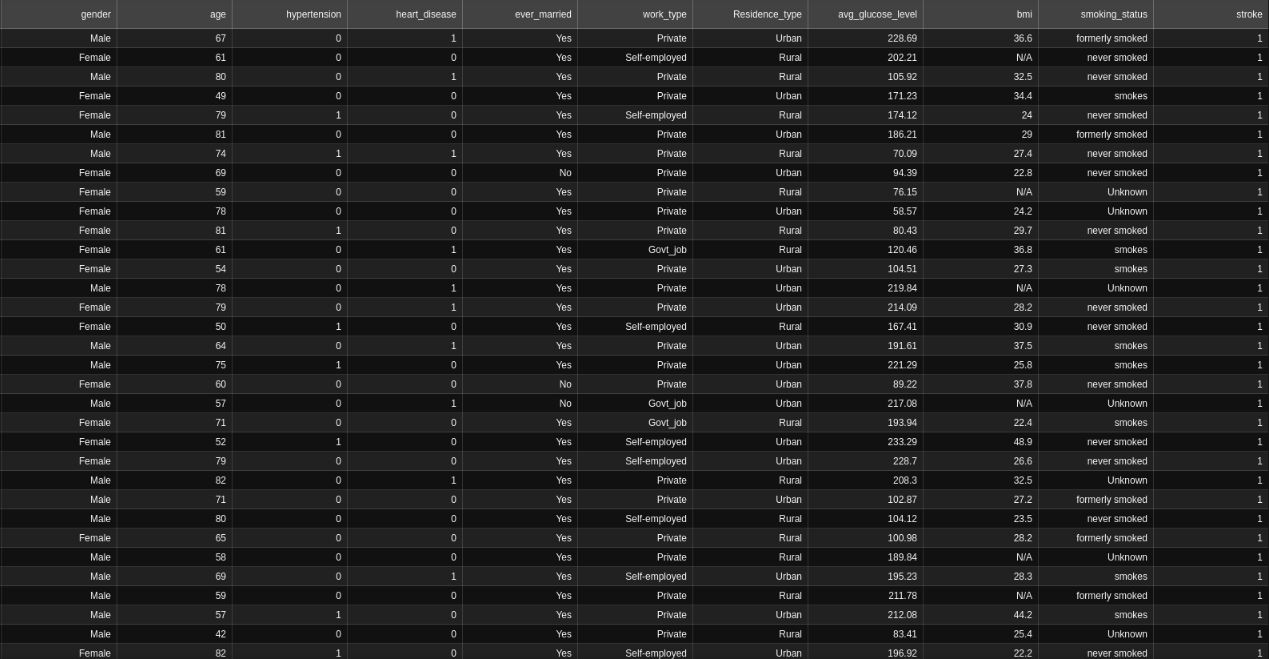  
<b>Imagem 9:</b> Tabela com os dados de ataque cardíaco.

Com esses pontos já é possível perceber que também há uma diferença de várias ordens de grandeza entre muitas das dimenções. Enquanto algumas ficam em 0 e, outras podem varias de 0 a 4 (seguindo o código explicado anteriormente, outras tem valores que podem ultrapassar 200, e essas três dimensões com essa característica, uma é discreta e dificilmente ultrapassa 120, as outras são contínuas, uma porém não passa de 100, enquanto a outra frequentemente está acima de 200. Desta forma, observa-se que uma normalização nesses dados também é necessária.

Como citado, não é possível exibir esses dados graficamente, porém ainda é possível avaliá-los. Um primeira abordagem, como feito anteriormente, é aplicar o método de Elbow, o resultado é exibido a seguir:  
![Elbow Heart](../images/Elbow2.jpg)  
<b>Imagem 10:</b> Método de Elbow aplicado aos dados de ataque cardíaco normalizados.

Este gráfico possui um comportamente um pouco diferente do mostrado na Imagem 7, ele também sobre mais com a aleatoriedade da inicialização, tendo seu resultado diferente a cada execução, porém, também é possível perceber um ponto onde a taxa de diminuição do custo se reduz consideravelmente e este ponto é, provavelmente, o k mais indicado para realizar a aplicação do método K-means sobre estes dados. Nesta aplicação, este ponto foi K = 6, porém, k = 9 está com um custo menor em relação a K = 6 e após ele os valores de custo não reduzem muito, então também será considerado.

Um dos métodos iniciais para a análise desses resultados foi a produção de histogramas com a quantidade de pontos por cluster e sua distribuição. Serão exibidos histogramas para K = 3, K = 6, K = 7, K = 9 e K = 25, para fins de comparação com os resultados escolhidos.

![Contagem K = 3](../images/clusterCount2_3.jpg)  
<b>Imagem 11:</b> Quantidade de pontos por Cluster para K = 3

![Contagem K = 6](../images/clusterCount2_6.jpg)  
<b>Imagem 12:</b> Quantidade de pontos por Cluster para K = 6

![Contagem K = 7](../images/clusterCount2_7.jpg)  
<b>Imagem 13:</b> Quantidade de pontos por Cluster para K = 7

![Contagem K = 9](../images/clusterCount2_9.jpg)  
<b>Imagem 14:</b> Quantidade de pontos por Cluster para K = 9

![Contagem K = 25](../images/clusterCount2_25.jpg)  
<b>Imagem 15:</b> Quantidade de pontos por Cluster para K = 25

Vale ressatar que devido a natureza aleatória da inicialização, oss clusters não estão na mesma ordem de um k para outro.

Todos os valores de K, com exceção de 3, apresentam uma distribuição semelhante de pontos por cluster, inclusive os dois valores selecionados, 6 e 9. Em todos há alguns clusters que possuem uma quantidade maior de pontos, uma maioria com uma quantidade mediana e alguns com uma quantidade menor. Este resultado não é um bom indicativo da qualidade de cada modelo, porém, pela forma como a distribuição se mantém, é possível inferir que há sim grupos bem definidos de pontos, que se subdividem conforme o k aumenta, isso seria visto mais facilmente se os dados fossem ordenados pela posição de cada cluster. K = 3 apressenta uma distribuição aproximadamente uniforme, isso não possui muito significado, apenas que todos os dados se concentram igualmente distribuídos em 3 macro setores do hiperespaço. Se os dados forem ordenados pela posição do cluster, essa característica poderia também ser observada nos outros gráficos e assim comprovada.

Outro dado que podemos analisar entre cada K é a quantidade de iterações necessárias para que o algoritmo pare, dada a margem de erro pré-estabelecida. Esses valores serão exibidos para os Ks citados anteriormente a seguir:

K   | Número de Iterações
--- | ------------------- 
3   | 7
6   | 9
7   | 9
9   | 7
25  | 10

<b>Tabela 2:</b> Número de iterações por execução com os dados de Ataque cardíaco.

Todas as opções de K também repetiram uma quantidade semelhante de vezes, então esta também não é uma boa métrica para decidir se o modelo está adequado.

# DBScan

O código desta etapa se encontra no notebook [DBScan](../Notebooks/dbscan_ra216179.ipynb).

Como dito anteriormente, a modelagem dos dados feita na etapa do Kmeans se provou ineficiente, ela então foi substituída por um novo formato. O dicionário com dois campos "cluster" e "matrix" permanece, no entanto, o conteúdo de matrix mudou. Agora, cada linha de matrix é um ponto, que é representado por um dicionário que contém os campos: "coord" - um np.array com as coordenadas do ponto, "neigh" - uma lista de vizinhos a esse ponto, "cluster" - o cluster atribuído a este ponto, inicializado com -2, para indicar que ele não foi visitado pelo algoritmo, "pos" - o índice do ponto na matriz. Este modelo se provou mais eficiente por exigir menos conversões para np.array, e facilitar os cálculos, pois muitas das funções necessitavam das coordenadas de cada ponto juntas num único vetor. Essa abordagem facilitou a implementação e provavelmente diminui o tempo de execução.

O código que faz a leitura e a transformação desses dados será exibido a seguir:

In [3]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in range(len(dataset)):
        point = getPoint(dataset[i],i)
        cleanDataset["matrix"].append(point)
        cleanDataset["cluster"].append(dataset[i]["cluster"])
    return cleanDataset
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    print2d(nDataset,"../images/originalData1.png")
    nDataset["matrix"] = normalize(nDataset["matrix"])

O código completo da implementação do algoritmo DBScan, com todas as funções auxiliares, pode ser encontrado no Notebook anexado anteriormente. Em seguida será anexado o código principal da solução. Neste caso a distância escolhida também foi a Euclidiana.

In [ ]:
def dbscan(dataset,den,ep):
        corePoints = getNeighs(dataset["matrix"],ep,den)
        getCluster(dataset["matrix"],dataset["cluster"],corePoints)

def getNeighs(dataset,ep,den):
    corePoints = []
    for i in range(len(dataset)):
        for j in range(i+1,len(dataset)):
            if getDistance(dataset[i]["coord"],dataset[j]["coord"]) < ep:
                dataset[i]["neigh"].append(j)
                dataset[j]["neigh"].append(i)
        if (len(dataset[i]["neigh"]) + 1) >= den:
            corePoints.append(i)
    return corePoints

def getCluster(matrix,clusters,corePoints):
    sumCluster = -1
    for i in corePoints:
        if matrix[i]["cluster"] == -2:
            sumCluster += 1
            matrix[i]["cluster"] = sumCluster
        clusters[i] = matrix[i]["cluster"]
        for j in matrix[i]["neigh"]:
            if matrix[j]["cluster"] > -2:
                continue
            matrix[j]["cluster"] = matrix[i]["cluster"]
            clusters[j] = matrix[i]["cluster"]
            
def cleanOutliers(dataset):
    clean = []
    for i in range(len(dataset["cluster"])):
        if(dataset["cluster"][i] <= -1):
            clean.append(i)
    for i in range(len(clean)):
        del dataset["cluster"][clean[i]-i]
        del dataset["matrix"][clean[i]-i]

O algoritmo consiste em encontrar todos os vizinhos para cada ponto dentro de um raio epsilon, se um ponto possui mais vizinhos, incluindo ele próprio, que um valor de densidade pré determinado, ele é um core point, se ele não tiver, porém é vizinho de um core point, então ele é um border point, por fim, se ele não tem vizinhos suficientes e não é alcançável por um core point, ele é um outlier. Após isso, toma-se todos os core points, todos os core points que são alcançáveis entre si ficam no mesmo cluster, então percorre-se os vizinhos de cada core point, todo ponto que é alcançável por pelo menos um core point fica no cluster deste core point, os que não são são outliers e são desprezados.

A nossa implementação percorre o dataset e para cada ponto, salva o índice dos seus vizinhos na sua lista de vizinhos, construindo um grafo de vizinhanças, então verifica-se quais pontos possuem uma quantidade de vizinhos igual ou superior à densidade e seus índices são adicionados a uma lista de core points. Após essa etapa a lista de core points é percorrida, para cada core point, se ele não foi visitado (cluster = -2) um novo cluster é criado e associado a este core point, se não, ele já possui um cluster associado, então sua lista de vizinhos é percorrida e aqueles que não foram visitados são associados ao cluster deste core point. Por fim, utiliza-se o método cleanOutliers para percorrer o dataset, todo ponto que não possui cluster associado (cluster < 0) é removido do conjunto.

## Efeito da Normalização

Tendo em vista os resultados e a execução da etapa anterior, essa etapa já executou todo o algoritmo com os dados normalizados. Não se sabe o resultado que seria obtido sem a normalização. No entanto, o DBScan é ainda mais sensível à diferença de grandeza entre as dimensões que o kmeans, uma vez que precisa encontrar a distância entre os pontos dentro de um raio. Pensando nos dados fornecidos, as distâncias no eixo y são da ordem de unidades ou dezenas, as distâncias no eixo x são da ordem de centenas e unidades de milhar. Um círculo não pode ser construído de forma que abranja as duas grandezas, ou o raio será numa ordem de grandez, ou em outra. Desta forma, dependendo da escolha que seja feita, ou todos os pontos, ou maioria, estarão dentro do raio do ponto avaliado, ou nenhum, devido o raio ser grande ou pequeno demais. Como não foi testado, isso não pôde ser observado, é apenas especulação teórica.  
A estratégia de normalização é a seguinte:

In [ ]:
def normalize(matrix):
    lists = []
    for i in range(len(matrix[0]["coord"])):
        lists.append(np.array(getList(matrix,i)))
    for i in range(len(lists)):
        norm = np.linalg.norm(lists[i])
        lists[i] = lists[i]/norm
    for i in range(len(lists[0])):
        for j in range(len(lists)):
            matrix[i]["coord"][j] = lists[j][i]
    return matrix

A estratégia é basicamente a mesma da anterior, encontrar a média de uma feature e dividir cada valor por essa média. Porém como o formato dos dados mudou, uma adaptação foi necessária para juntar cada valor numa lista para sua respectiva feature e assim encontrar a norma, que desta vez foi calculada usando o método adequado da biblioteca NumPy.

Os dados normalizados são:  
![Normalized data](../images/test.jpg)  
<b>Imagem 16:</b> Dados normalizados

## Resultados

Para o dataset fornecido pela professora, os dados originais são os mesmos da Imgem 3.

Por possuir 2 hiperparâmetros, o método de Elbow não foi aplicado para avaliação do resultado deste método, uma vez que ele exigiria a exibição de gráficos 3D para sua completa análise.

Para este dataset o epsilon utilizado foi 0,01 e a densidade foi 5.  
Para estes dois valores o resultado obtido foi:  
![Resposta DBScan](../images/dbscanClustered1.jpg)  
<b>Imagem 17:</b> Resultado DBScan para dados fornecidos.

O resultado obtido foi, aparentemente, o mesmo obtido pelo Kmeans, que visualmente é o resultado correto, o algoritmo encontrou os três clusters que eram esperados e marcou todos os pontos no cluster correto como visualmente esperado.

Para os dados de ataque cardíaco, ainda existe o mesmo problema do anterior, por serem 11 dimensões não é possível plotar um gráfico com esses dados e observar quais clusters deveriam ser mostrados, outras métricas devem ser utilizadas então para avaliar o resultado.

A primeira métrica usada para avaliar o resultado foi a quantidade de pontos por cluster, neste caso também inclui a quantidade de clusters, pois este não é pre-definido pelo algoritmo, mas decidido pelo próprio algoritmo.

Serão exibidos os resultados para alguns valores de epsilon e alguns valores de densidade, estes resultados serão discutidos depois.

![Epsilon = 0.02 Density = 10](../images/dbscanCount2_10_002.jpg)  
<b>Imagem 18:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 10  
![Epsilon = 0.02 Density = 20](../images/dbscanCount2_20_002.jpg)  
<b>Imagem 19:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 20  
![Epsilon = 0.02 Density = 30](../images/dbscanCount2_30_002.jpg)  
<b>Imagem 20:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 30  
![Epsilon = 0.02 Density = 40](../images/dbscanCount2_40_002.jpg)  
<b>Imagem 21:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 40  
![Epsilon = 0.02 Density = 50](../images/dbscanCount2_50_002.jpg)  
<b>Imagem 22:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 40  
![Epsilon = 0.02 Density = 60](../images/dbscanCount2_60_002.jpg)  
<b>Imagem 23:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 60  
![Epsilon = 0.02 Density = 70](../images/dbscanCount2_70_002.jpg)  
<b>Imagem 24:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 70  
![Epsilon = 0.02 Density = 80](../images/dbscanCount2_80_002.jpg)  
<b>Imagem 25:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 80  
![Epsilon = 0.02 Density = 90](../images/dbscanCount2_90_002.jpg)  
<b>Imagem 26:</b> Pontos por Cluster - Epsilon = 0.02, Densidade = 90  
![Epsilon = 0.05 Density = 10](../images/dbscanCount2_10_005.jpg)  
<b>Imagem 27:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 10  
![Epsilon = 0.05 Density = 20](../images/dbscanCount2_20_005.jpg)  
<b>Imagem 28:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 20  
![Epsilon = 0.05 Density = 30](../images/dbscanCount2_30_005.jpg)  
<b>Imagem 29:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 30  
![Epsilon = 0.05 Density = 40](../images/dbscanCount2_40_005.jpg)  
<b>Imagem 30:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 40  
![Epsilon = 0.05 Density = 50](../images/dbscanCount2_50_005.jpg)  
<b>Imagem 31:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 40  
![Epsilon = 0.05 Density = 60](../images/dbscanCount2_60_005.jpg)  
<b>Imagem 32:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 60  
![Epsilon = 0.05 Density = 70](../images/dbscanCount2_70_005.jpg)  
<b>Imagem 33:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 70  
![Epsilon = 0.05 Density = 80](../images/dbscanCount2_80_005.jpg)  
<b>Imagem 34:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 80  
![Epsilon = 0.05 Density = 90](../images/dbscanCount2_90_005.jpg)  
<b>Imagem 35:</b> Pontos por Cluster - Epsilon = 0.05, Densidade = 90  

Os resultados foram obtidos testando 10 valores diferentes de densidade para dois diferentes valores de epsilon. O que se observa é que variar a densidade não altera quais clusters foram escolhidos, apenas elimina clusters muito pequenos, que passam a ser considerados como Outliers e os que não são eliminados podem ser ligeiramente diminuídos por perderem seus pontos mais externos, essa mudança, no entanto, não pode ser percebida na escala do gráfico. No entanto, caso um valor muito maior de densidade fosse escolhido eventualmente acabaria fazendo todos os clusters desaparecerem. Por outro lado, a variação escolhida já foi razoavelmente grande e houve poucas mudanças, o que indica que este dataset é bastante denso. Já a alteração do epsilon faz com que os clusters se alteram muito de tamanho, fazendo com que os clusters sejam completamente redimensionados. Aparentemente, o epsilon 0.05 é muito grande e capaz de colocar quase todos os pontos juntos, provavelmente um epsilon um pouco maior produzirá apenas um cluster. A alteração de densidade para este Epsilon produz praticamente nenhuma alteração, corroborando a hipótese de que estes clusters são muito densos. Os quatro Cluster encontrados são um indicativo de que grande parte dos pontos estão concentrados em apenas quatro grandes regiões do hiperespaço. O Epsilon 0.02 é aparentemente melhor para análise, é capaz de diferenciar melhor as clusters e produz de 7-9 clusters bastante representativos, como o K-means também produziu, potencialmente os mesmos, além de alguns clusters residuais que desaparecem com o aumento da densidade. 

Apesar desta análise preliminar, esses valores não nos trazem nenhuma informação sobre a qualidade do modelo e outras métricas precisam ser usadas para a avaliação.